In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

In [ ]:
breast = pd.read_csv('/content/breast cancer.csv')
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
breast.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Class Distribution:
Counter({0: 357, 1: 212})

Total samples: 569
Class 0 (Benign): 357 samples (62.74%)
Class 1 (Malignant): 212 samples (37.26%)


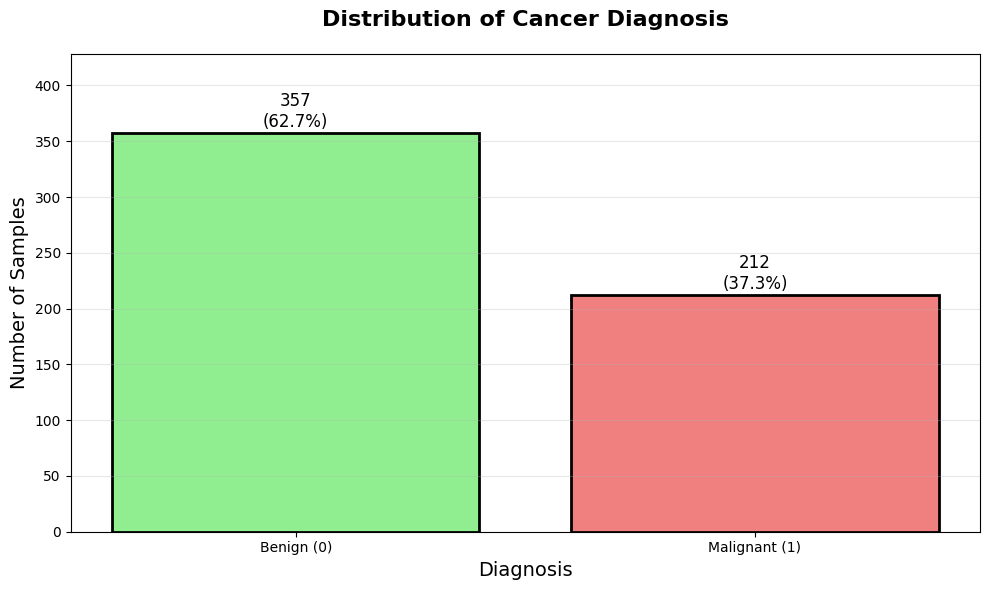

In [ ]:
# Count of each class
class_counts = Counter(y)
print(f"Class Distribution:\n{class_counts}")
print(f"\nTotal samples: {len(y)}")
print(f"Class 0 (Benign): {class_counts[0]} samples ({class_counts[0]/len(y)*100:.2f}%)")
print(f"Class 1 (Malignant): {class_counts[1]} samples ({class_counts[1]/len(y)*100:.2f}%)")

# Bar plot
plt.figure(figsize=(10, 6))
colors = ['lightgreen', 'lightcoral']
bars = plt.bar(['Benign (0)', 'Malignant (1)'],
               [class_counts[0], class_counts[1]],
               color=colors, edgecolor='black', linewidth=2)

# Add count labels on bars
for bar, count in zip(bars, [class_counts[0], class_counts[1]]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{count}\n({count/len(y)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Cancer Diagnosis', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.ylim(0, max(class_counts.values()) * 1.2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

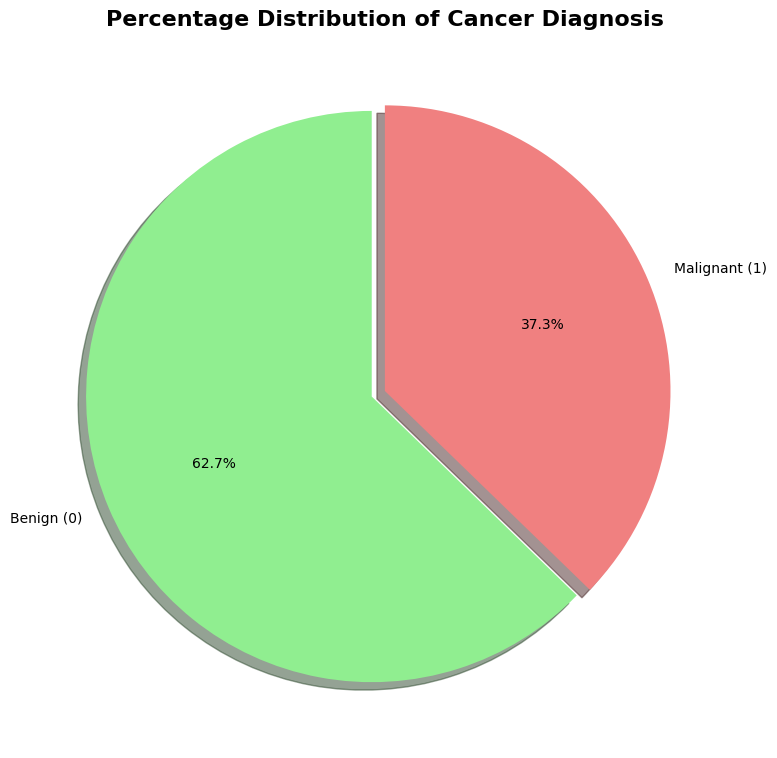

In [ ]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie([class_counts[0], class_counts[1]],
        labels=['Benign (0)', 'Malignant (1)'],
        colors=['lightgreen', 'lightcoral'],
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0),  # explode the 1st slice
        shadow=True)
plt.title('Percentage Distribution of Cancer Diagnosis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

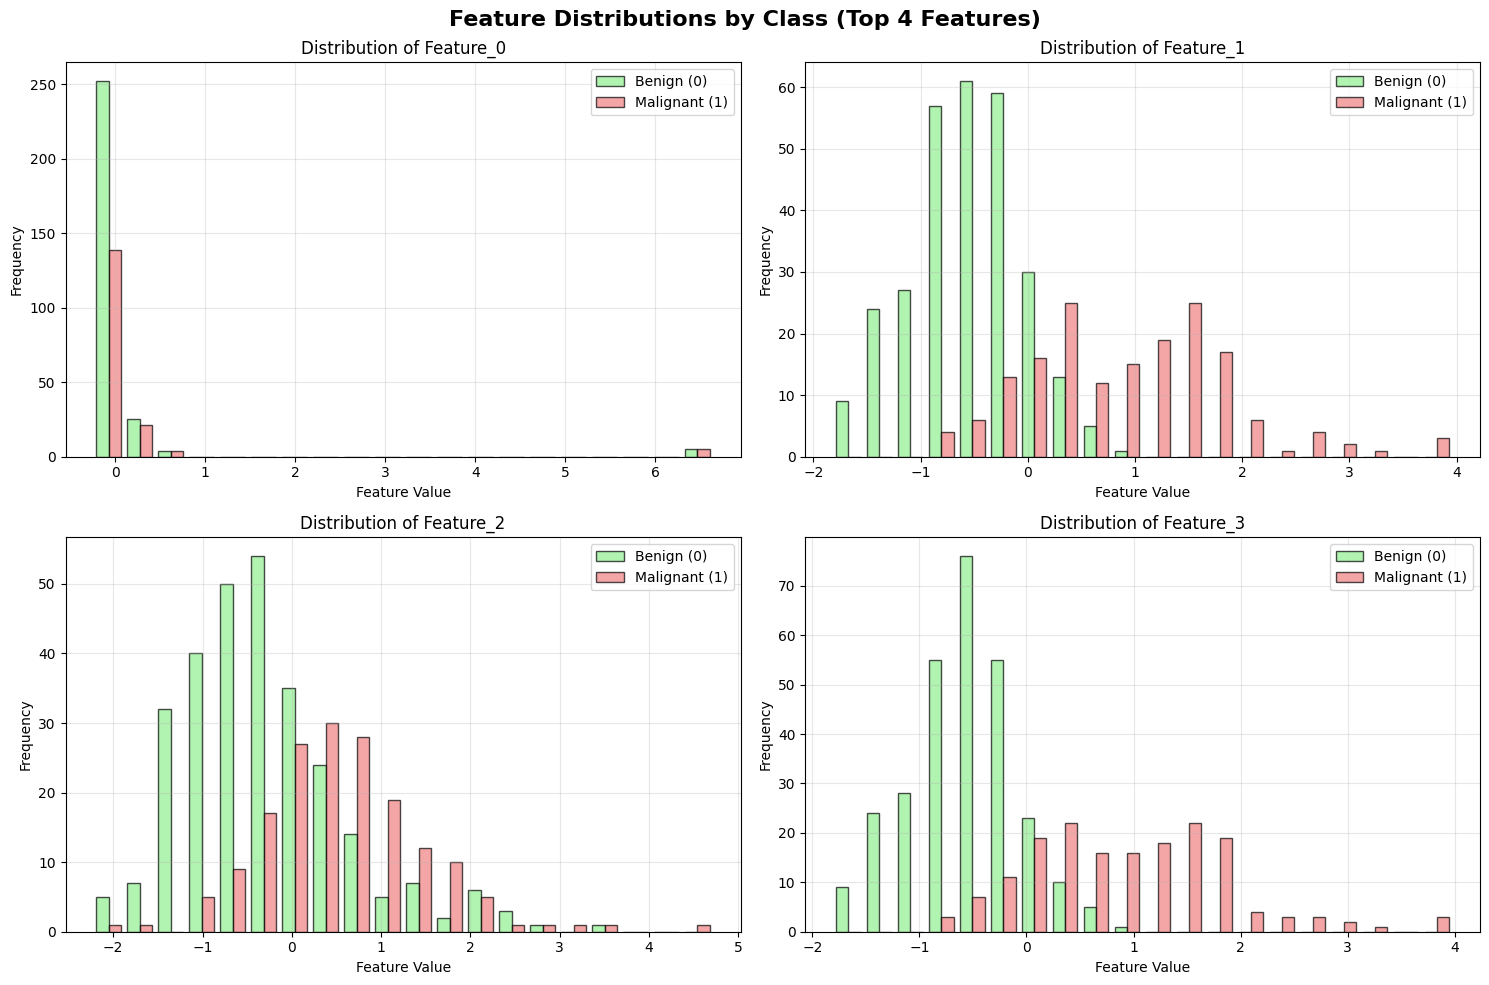

In [ ]:
# Visualize feature distributions by class (top 4 features)
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Select top 4 features for visualization
top_features_idx = [0, 1, 2, 3]  # or use feature importance to select
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature_idx in enumerate(top_features_idx[:4]):
    # Combine feature values with target labels
    feature_values = X_train.iloc[:, feature_idx] if hasattr(X_train, 'iloc') else X_train[:, feature_idx]
    feature_name = feature_names[feature_idx] if i < len(feature_names) else f'Feature {feature_idx}'

    # Separate by class
    class_0_values = feature_values[y_train == 0]
    class_1_values = feature_values[y_train == 1]

    # Create histogram
    axes[i].hist([class_0_values, class_1_values],
                 bins=20,
                 color=['lightgreen', 'lightcoral'],
                 alpha=0.7,
                 label=['Benign (0)', 'Malignant (1)'],
                 edgecolor='black')

    axes[i].set_title(f'Distribution of {feature_name}', fontsize=12)
    axes[i].set_xlabel('Feature Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.suptitle('Feature Distributions by Class (Top 4 Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import plot_tree

print("\n" + "="*50)
print("DECISION TREE CLASSIFIER")
print("="*50)

# Initialize Decision Tree with different parameters
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,          # Limit tree depth to prevent overfitting
    min_samples_split=10, # Minimum samples required to split a node
    min_samples_leaf=5,   # Minimum samples required at a leaf node
    criterion='gini'      # Splitting criterion
)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree trained successfully!")
print(f"Tree Depth: {dt.get_depth()}")
print(f"Number of Leaves: {dt.get_n_leaves()}")


DECISION TREE CLASSIFIER
Decision Tree trained successfully!
Tree Depth: 5
Number of Leaves: 12


In [ ]:
# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print("\n" + "-"*50)
print("PERFORMANCE METRICS")
print("-"*50)
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall (Sensitivity): {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")

# Detailed classification report
print("\n" + "-"*50)
print("CLASSIFICATION REPORT")
print("-"*50)
print(classification_report(y_test, y_pred_dt,
                            target_names=['Benign (0)', 'Malignant (1)']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()

print("\n" + "-"*50)
print("CONFUSION MATRIX ANALYSIS")
print("-"*50)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nSpecificity (TN Rate): {tn/(tn+fp):.4f}")
print(f"False Positive Rate: {fp/(fp+tn):.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")


--------------------------------------------------
PERFORMANCE METRICS
--------------------------------------------------
Accuracy: 0.9474
Precision: 0.9512
Recall (Sensitivity): 0.9070
F1-Score: 0.9286
ROC-AUC Score: 0.9358

--------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------
               precision    recall  f1-score   support

   Benign (0)       0.95      0.97      0.96        71
Malignant (1)       0.95      0.91      0.93        43

     accuracy                           0.95       114
    macro avg       0.95      0.94      0.94       114
 weighted avg       0.95      0.95      0.95       114


--------------------------------------------------
CONFUSION MATRIX ANALYSIS
--------------------------------------------------
True Negatives (TN): 69
False Positives (FP): 2
False Negatives (FN): 4
True Positives (TP): 39

Specificity (TN Rate): 0.9718
False Positive Rate: 0.0282
False Negative Rate: 0.0930


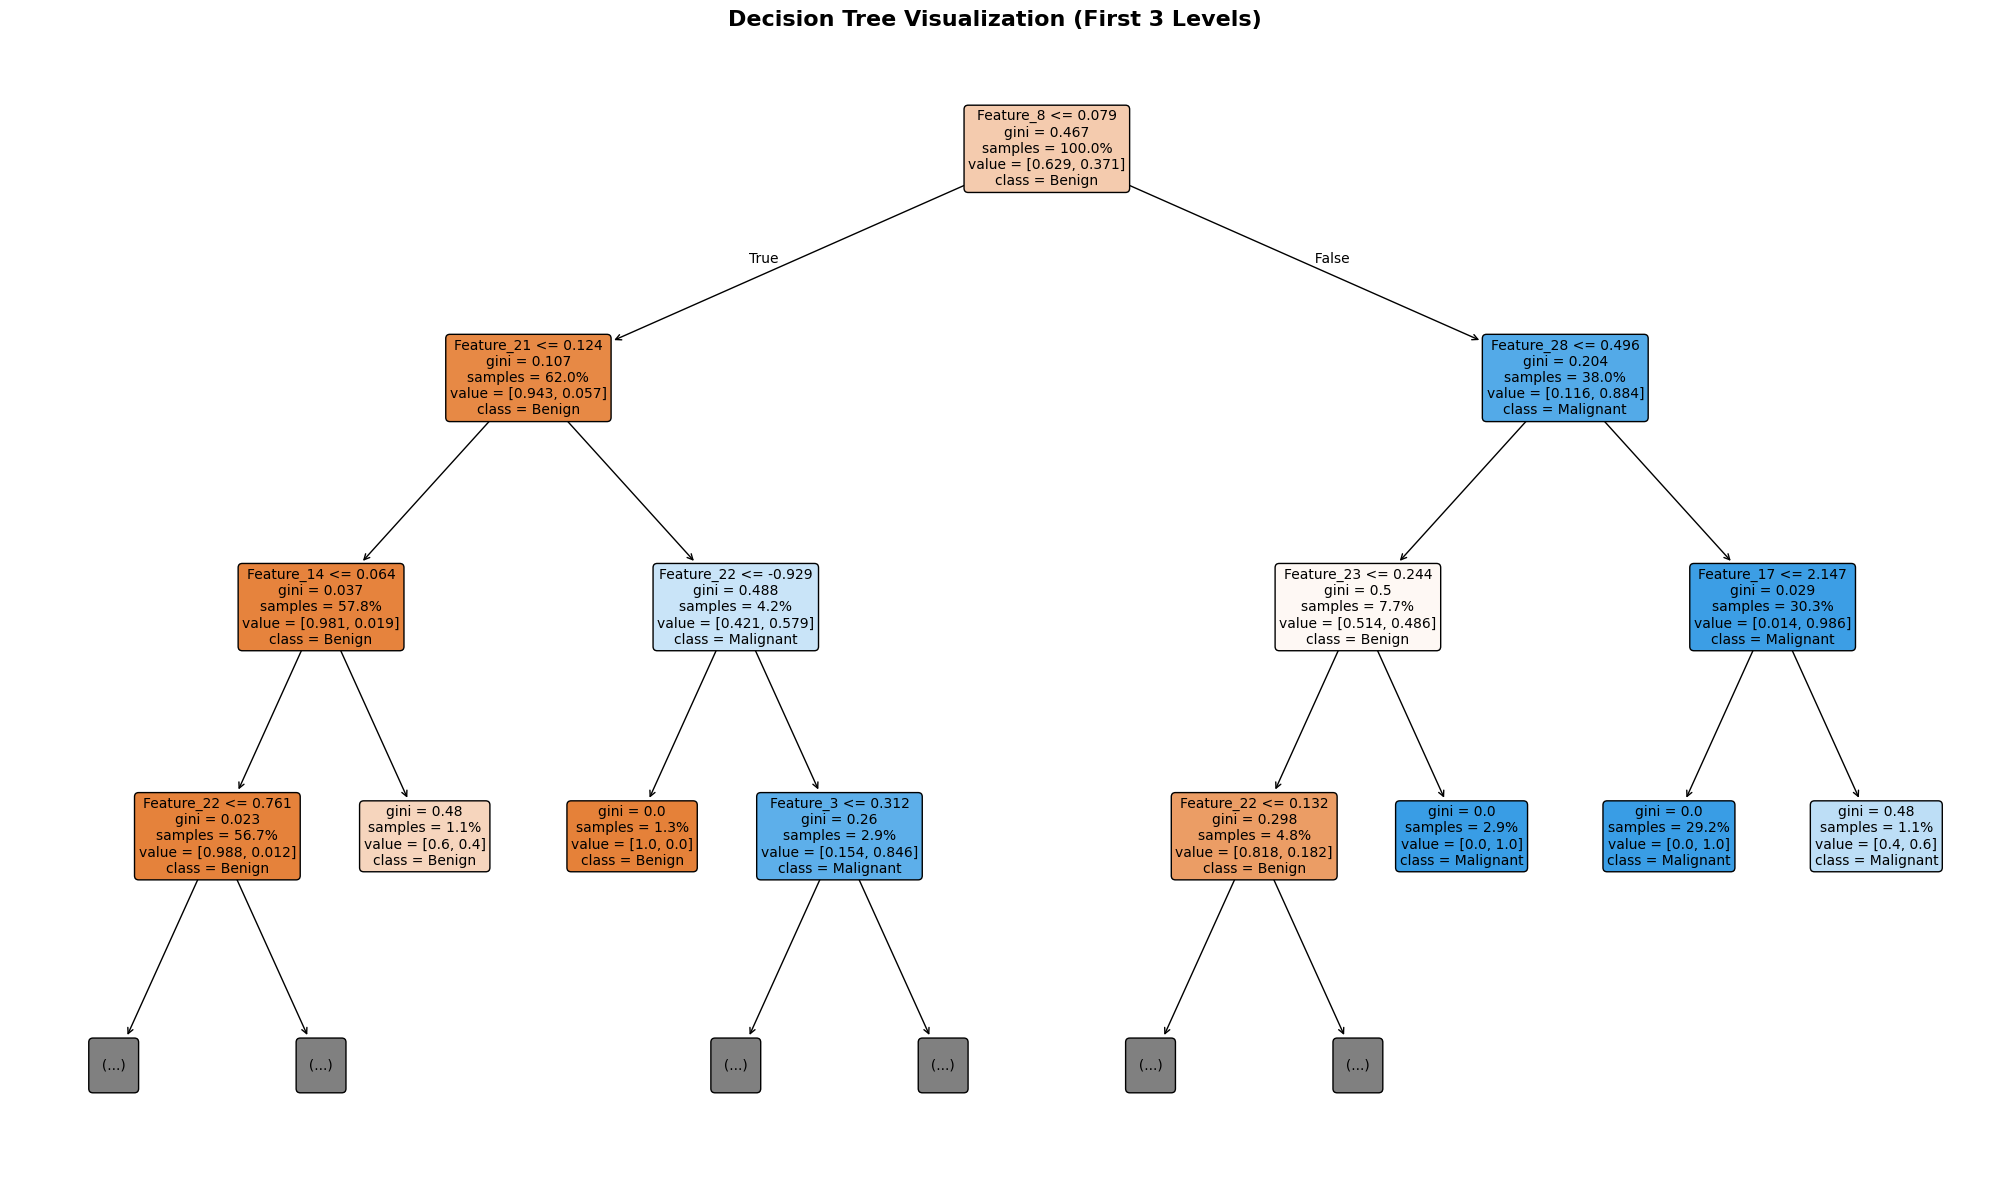

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(dt,
          feature_names=feature_names if 'feature_names' in locals() else None,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10,
          max_depth=3)  # Show only first 3 levels for clarity
plt.title("Decision Tree Visualization (First 3 Levels)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


FEATURE IMPORTANCE (Decision Tree)
   Feature  Importance
 Feature_8    0.736484
Feature_28    0.069930
Feature_21    0.062078
Feature_22    0.056572
Feature_23    0.054850
Feature_17    0.007731
Feature_14    0.007418
 Feature_3    0.004936
 Feature_6    0.000000
 Feature_9    0.000000


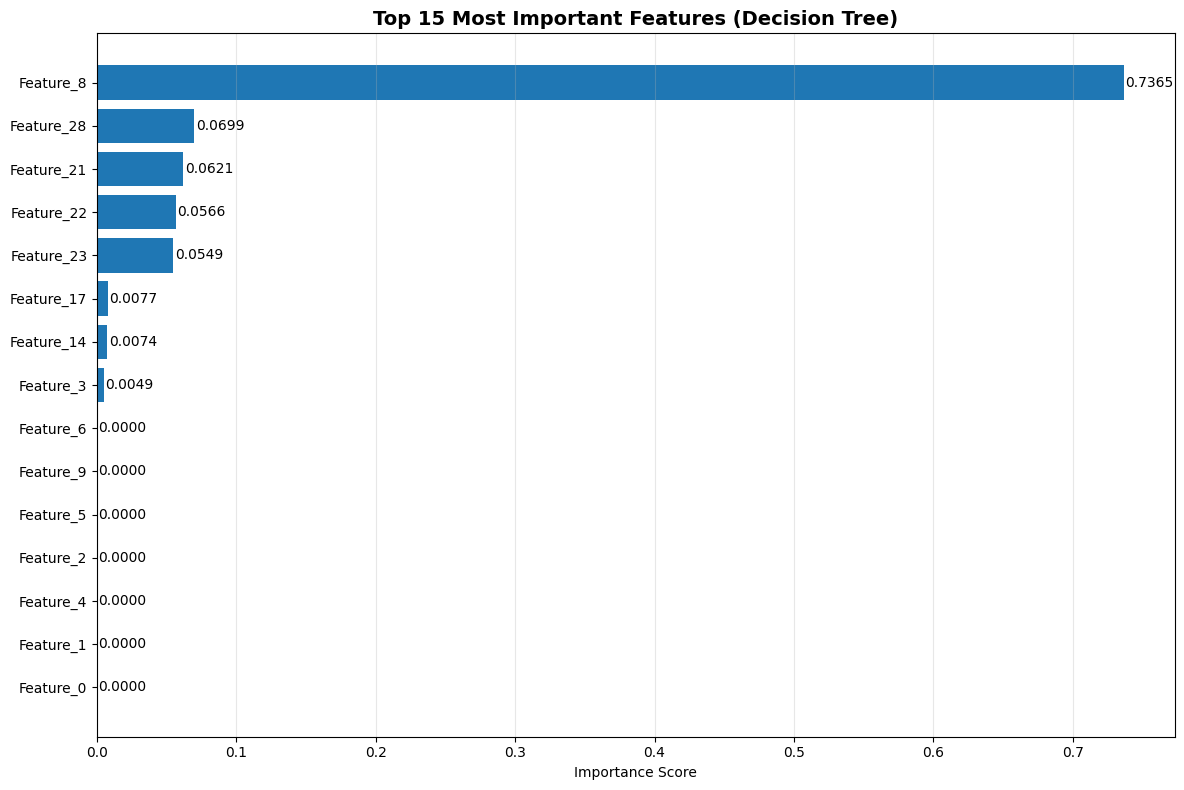

In [ ]:
# Feature importance
feature_importance = dt.feature_importances_

# Create DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names if 'feature_names' in locals() else [f'Feature_{i}' for i in range(len(feature_importance))],
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE (Decision Tree)")
print("="*50)
print(importance_df.head(10).to_string(index=False))

# Visualize top 15 important features
plt.figure(figsize=(12, 8))
top_n = min(15, len(importance_df))
top_features = importance_df.head(top_n)

bars = plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Most Important Features (Decision Tree)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, importance) in enumerate(zip(bars, top_features['Importance'])):
    plt.text(importance + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance:.4f}',
             ha='left', va='center')

plt.tight_layout()
plt.show()

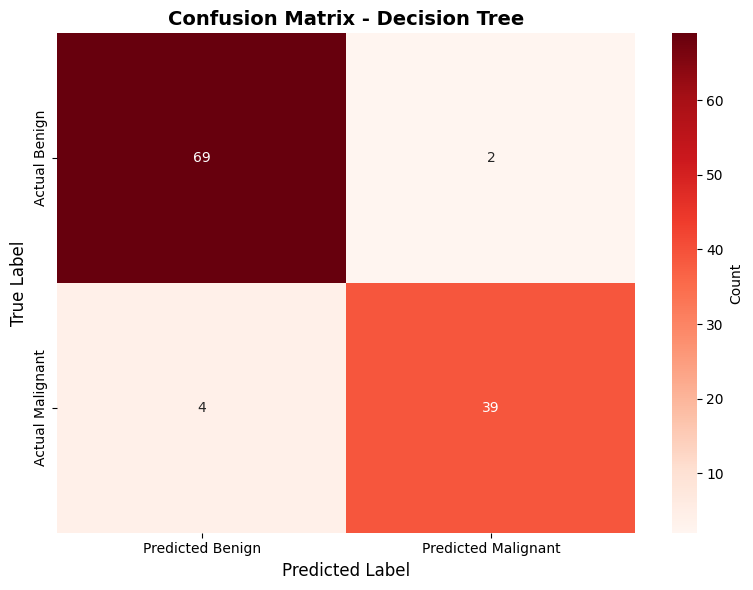

In [ ]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt,
            annot=True,
            fmt='d',
            cmap='Reds',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Your input for prediction
input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
        1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
        2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
       -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
        0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
        1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
        3.15970842)

np_df = np.asarray(input_text)

# Make prediction with Decision Tree
pred_dt = dt.predict(np_df.reshape(1,-1))
pred_proba_dt = dt.predict_proba(np_df.reshape(1,-1))

print("\n" + "="*50)
print("SINGLE PREDICTION - DECISION TREE")
print("="*50)
print(f"Prediction Probabilities: {pred_proba_dt[0]}")
print(f"Probability of Benign (0): {pred_proba_dt[0][0]:.2%}")
print(f"Probability of Malignant (1): {pred_proba_dt[0][1]:.2%}")
print(f"Predicted Class: {pred_dt[0]}")

if pred_dt[0] == 1:
    print("🔴 Decision Tree Diagnosis: MALIGNANT (Cancerous)")
    print(f"   Confidence: {pred_proba_dt[0][1]:.2%}")
else:
    print("🟢 Decision Tree Diagnosis: BENIGN (Not Cancerous)")
    print(f"   Confidence: {pred_proba_dt[0][0]:.2%}")


SINGLE PREDICTION - DECISION TREE
Prediction Probabilities: [0. 1.]
Probability of Benign (0): 0.00%
Probability of Malignant (1): 100.00%
Predicted Class: 1
🔴 Decision Tree Diagnosis: MALIGNANT (Cancerous)
   Confidence: 100.00%


In [ ]:
# Show the decision path for the single prediction
node_indicator = dt.decision_path(np_df.reshape(1,-1))
leaf_id = dt.apply(np_df.reshape(1,-1))

print("\n" + "-"*50)
print("DECISION PATH ANALYSIS")
print("-"*50)
print(f"Total nodes in tree: {dt.tree_.node_count}")
print(f"Leaf node reached: {leaf_id[0]}")
print(f"Number of nodes in path: {node_indicator.indices.shape[0]}")

# Get feature thresholds for nodes in the path
feature = dt.tree_.feature
threshold = dt.tree_.threshold

print("\nDecision rules followed:")
for node_index in node_indicator.indices:
    if leaf_id[0] == node_index:
        continue  # Skip leaf node

    if feature[node_index] != -2:  # Not a leaf node
        feature_name = feature_names[feature[node_index]] if 'feature_names' in locals() else f"Feature_{feature[node_index]}"
        feature_value = np_df[feature[node_index]]

        if threshold[node_index] != -2:
            comparison = "≤" if feature_value <= threshold[node_index] else ">"
            print(f"Node {node_index}: {feature_name} = {feature_value:.3f} {comparison} {threshold[node_index]:.3f}")


--------------------------------------------------
DECISION PATH ANALYSIS
--------------------------------------------------
Total nodes in tree: 23
Leaf node reached: 21
Number of nodes in path: 4

Decision rules followed:
Node 0: Feature_8 = 0.093 > 0.079
Node 14: Feature_28 = 0.619 > 0.496
Node 20: Feature_17 = 0.287 ≤ 2.147


In [ ]:
from sklearn.model_selection import GridSearchCV

print("\n" + "="*50)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("="*50)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use best estimator
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test accuracy with best model: {accuracy_best:.4f}")


HYPERPARAMETER TUNING WITH GRID SEARCH
Fitting 5 folds for each of 160 candidates, totalling 800 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9473
Test accuracy with best model: 0.9561


In [ ]:
import pickle
pickle.dump(best_dt,open('model(decision tree).pkl','wb'))